## Predictors of Bivalent Vaccine Uptake at the County Level

In this notebook, we look at the avaialability of vaccination clinics and compare it COVID bivalent vaccine uptake within each of the U.S. counties.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import geopandas as gpd
import statsmodels.formula.api as sm


In [2]:
date_list = ["02/01/2023"]
year_list = [2020]

In [3]:
states_list = [
    "AL",
    "AK",
    "AZ",
    "AR",
    "CA",
    "CO",
    "CT",
    "DE",
    "FL",
    "GA",
    #"HI",
    "ID",
    "IL",
    "IN",
    "IA",
    "KS",
    "KY",
    "LA",
    "ME",
    "MD",
    "MA",
    "MI",
    "MN",
    "MS",
    "MO",
    "MT",
    "NE",
    "NV",
    "NH",
    "NJ",
    "NM",
    "NY",
    "NC",
    "ND",
    "OH",
    "OK",
    "OR",
    "PA",
    "RI",
    "SC",
    "SD",
    "TN",
    "TX",
    "UT",
    "VT",
    "VA",
    "WA",
    "WV",
    "WI",
    "WY",
]

In [4]:
fips_to_state = {
    "01": "AL",
    "02": "AK",
    "04": "AZ",
    "05": "AR",
    "06": "CA",
    "08": "CO",
    "09": "CT",
    "10": "DE",
    "11": "DC",
    "12": "FL",
    "13": "GA",
    "15": "HI",
    "16": "ID",
    "17": "IL",
    "18": "IN",
    "19": "IA",
    "20": "KS",
    "21": "KY",
    "22": "LA",
    "23": "ME",
    "24": "MD",
    "25": "MA",
    "26": "MI",
    "27": "MN",
    "28": "MS",
    "29": "MO",
    "30": "MT",
    "31": "NE",
    "32": "NV",
    "33": "NH",
    "34": "NJ",
    "35": "NM",
    "36": "NY",
    "37": "NC",
    "38": "ND",
    "39": "OH",
    "40": "OK",
    "41": "OR",
    "42": "PA",
    "44": "RI",
    "45": "SC",
    "46": "SD",
    "47": "TN",
    "48": "TX",
    "49": "UT",
    "50": "VT",
    "51": "VA",
    "53": "WA",
    "54": "WV",
    "55": "WI",
    "56": "WY",
}

In [5]:
states_to_abv = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}

In [6]:
ipums_to_demo = {
    "COUNTY": "county",
    "STATE": "state",
    "ALT0E001": "total_age",
    "ALT0E002": "male",
    "ALT0E003": "male_under_5",
    "ALT0E004": "male_5_to_9",
    "ALT0E005": "male_10_to_14",
    "ALT0E006": "male_15_to_17",
    "ALT0E007": "male_18_and_19",
    "ALT0E008": "male_20",
    "ALT0E009": "male_21",
    "ALT0E010": "male_22_to_24",
    "ALT0E011": "male_25_to_29",
    "ALT0E012": "male_30_to_34",
    "ALT0E013": "male_35_to_39",
    "ALT0E014": "male_40_to_44",
    "ALT0E015": "male_45_to_49",
    "ALT0E016": "male_50_to_54",
    "ALT0E017": "male_55_to_59",
    "ALT0E018": "male_60_and_61",
    "ALT0E019": "male_62_to_64",
    "ALT0E020": "male_65_and_66",
    "ALT0E021": "male_67_to_69",
    "ALT0E022": "male_70_to_74",
    "ALT0E023": "male_75_to_79",
    "ALT0E024": "male_80_to_84",
    "ALT0E025": "male_85_years_and_over",
    "ALT0E026": "female",
    "ALT0E027": "female_under_5",
    "ALT0E028": "female_5_to 9",
    "ALT0E029": "female_10_to 14",
    "ALT0E030": "female_15_to 17",
    "ALT0E031": "female_18_and 19",
    "ALT0E032": "female_20",
    "ALT0E033": "female_21",
    "ALT0E034": "female_22_to_24",
    "ALT0E035": "female_25_to_29",
    "ALT0E036": "female_30_to_34",
    "ALT0E037": "female_35_to_39",
    "ALT0E038": "female_40_to_44",
    "ALT0E039": "female_45_to_49",
    "ALT0E040": "female_50_to_54",
    "ALT0E041": "female_55_to_59",
    "ALT0E042": "female_60_and_61",
    "ALT0E043": "female_62_to_64",
    "ALT0E044": "female_65_and_66",
    "ALT0E045": "female_67_to_69",
    "ALT0E046": "female_70_to_74",
    "ALT0E047": "female_75_to_79",
    "ALT0E048": "female_80_to_84",
    "ALT0E049": "female_85_years_and_over",
    "ALUCE001": "total_race",
    "ALUCE002": "white_alone",
    "ALUCE003": "black_or_african_american_alone",
    "ALUCE004": "american_indian_and_alaska_native_alone",
    "ALUCE005": "asian_alone",
    "ALUCE006": "native_hawaiian_and_other_pacific_islander_alone",
    "ALUCE007": "some_other_race_alone",
    "ALUCE008": "two_or_more_races",
    "ALUCE009": "two_or_more_races_two_races_including_some_other_race",
    "ALUCE010": "two or more races_two_races_excluding_some_other_race_and_three_or_more_races",
    "ALUKE001": "total_hispanic",
    "ALUKE002": "not_hispanic_or_latino",
    "ALUKE003": "not_hispanic_or_latino_white_alone",
    "ALUKE004": "not_hispanic_or_latino_black_or_african_american_alone",
    "ALUKE005": "not_hispanic_or_latino_american_indian_and_alaska_native_alone",
    "ALUKE006": "not_hispanic_or_latino_asian_alone",
    "ALUKE007": "not_hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone",
    "ALUKE008": "not_hispanic_or_latino_some_other_race_alone",
    "ALUKE009": "not_hispanic_or_latino_two_or_more_races",
    "ALUKE010": "not_hispanic_or_latino_two_or_more_races_two_races_including_some_other_race",
    "ALUKE011": "not_hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races",
    "ALUKE012": "hispanic_or_latino",
    "ALUKE013": "hispanic_or_latino_white_alone",
    "ALUKE014": "hispanic_or_latino_black_or_african_american_alone",
    "ALUKE015": "hispanic_or_latino_american_indian_and_alaska_native_alone",
    "ALUKE016": "hispanic_or_latino_asian_alone",
    "ALUKE017": "hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone",
    "ALUKE018": "hispanic_or_latino_some_other_race_alone",
    "ALUKE019": "hispanic_or_latino_two_or_more_races",
    "ALUKE020": "hispanic_or_latino_two_or_more_races_two_races_including_some_other_race",
    "ALUKE021": "hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races",
    "ALWGE001": "total_education",
    "ALWGE002": "no_schooling_completed",
    "ALWGE003": "nursery_school",
    "ALWGE004": "kindergarten",
    "ALWGE005": "1st_grade",
    "ALWGE006": "2nd_grade",
    "ALWGE007": "3rd_grade",
    "ALWGE008": "4th_grade",
    "ALWGE009": "5th_grade",
    "ALWGE010": "6th_grade",
    "ALWGE011": "7th_grade",
    "ALWGE012": "8th_grade",
    "ALWGE013": "9th_grade",
    "ALWGE014": "10th_grade",
    "ALWGE015": "11th_grade",
    "ALWGE016": "12th_grade_no_diploma",
    "ALWGE017": "regular_high_school_diploma",
    "ALWGE018": "GED_or_alternative_credential",
    "ALWGE019": "some_college_less_than_1_year",
    "ALWGE020": "some_college_1_or_more_years_no degree",
    "ALWGE021": "associate_degree",
    "ALWGE022": "bachelor_degree",
    "ALWGE023": "master_degree",
    "ALWGE024": "professional_school_degree",
    "ALWGE025": "doctorate_degree",
    "ALW1E001": "median_household_income_in_the_past_12_months",
}

In [7]:
age_demo = [
    "male",
    "male_under_5",
    "male_5_to_9",
    "male_10_to_14",
    "male_15_to_17",
    "male_18_and_19",
    "male_20",
    "male_21",
    "male_22_to_24",
    "male_25_to_29",
    "male_30_to_34",
    "male_35_to_39",
    "male_40_to_44",
    "male_45_to_49",
    "male_50_to_54",
    "male_55_to_59",
    "male_60_and_61",
    "male_62_to_64",
    "male_65_and_66",
    "male_67_to_69",
    "male_70_to_74",
    "male_75_to_79",
    "male_80_to_84",
    "male_85_years_and_over",
    "female",
    "female_under_5",
    "female_5_to 9",
    "female_10_to 14",
    "female_15_to 17",
    "female_18_and 19",
    "female_20",
    "female_21",
    "female_22_to_24",
    "female_25_to_29",
    "female_30_to_34",
    "female_35_to_39",
    "female_40_to_44",
    "female_45_to_49",
    "female_50_to_54",
    "female_55_to_59",
    "female_60_and_61",
    "female_62_to_64",
    "female_65_and_66",
    "female_67_to_69",
    "female_70_to_74",
    "female_75_to_79",
    "female_80_to_84",
    "female_85_years_and_over"
]

In [8]:
race_demo = [
    "white_alone",
    "black_or_african_american_alone",
    "american_indian_and_alaska_native_alone",
    "asian_alone",
    "native_hawaiian_and_other_pacific_islander_alone",
    "some_other_race_alone",
    "two_or_more_races",
    "two_or_more_races_two_races_including_some_other_race",
    "two or more races_two_races_excluding_some_other_race_and_three_or_more_races",
]

In [9]:
hispanic_demo = [ 
"not_hispanic_or_latino", 
"not_hispanic_or_latino_white_alone", 
"not_hispanic_or_latino_black_or_african_american_alone", 
"not_hispanic_or_latino_american_indian_and_alaska_native_alone", 
"not_hispanic_or_latino_asian_alone", 
"not_hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone", 
"not_hispanic_or_latino_some_other_race_alone", 
"not_hispanic_or_latino_two_or_more_races", 
"not_hispanic_or_latino_two_or_more_races_two_races_including_some_other_race", 
"not_hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races", 
"hispanic_or_latino", 
"hispanic_or_latino_white_alone", 
"hispanic_or_latino_black_or_african_american_alone", 
"hispanic_or_latino_american_indian_and_alaska_native_alone", 
"hispanic_or_latino_asian_alone", 
"hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone", 
"hispanic_or_latino_some_other_race_alone", 
"hispanic_or_latino_two_or_more_races", 
"hispanic_or_latino_two_or_more_races_two_races_including_some_other_race", 
"hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races"]

In [10]:
education_demo = [
    "no_schooling_completed",
    "nursery_school",
    "kindergarten",
    "1st_grade",
    "2nd_grade",
    "3rd_grade",
    "4th_grade",
    "5th_grade",
    "6th_grade",
    "7th_grade",
    "8th_grade",
    "9th_grade",
    "10th_grade",
    "11th_grade",
    "12th_grade_no_diploma",
    "regular_high_school_diploma",
    "GED_or_alternative_credential",
    "some_college_less_than_1_year",
    "some_college_1_or_more_years_no degree",
    "associate_degree",
    "bachelor_degree",
    "master_degree",
    "professional_school_degree",
    "doctorate_degree"
]

#### import datasets

In [11]:
# import vaccine dataset from: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh

vaccinations_raw = pd.read_csv(
    "../../data/county_level/COVID-19_Vaccinations_in_the_United_States_County.csv"
)

In [12]:
# import flu locations dataset from: https://data.cdc.gov/Flu-Vaccinations/Vaccines-gov-Flu-vaccinating-provider-locations/bugr-bbfr

flu_locations_raw = pd.read_csv(
    "../../data/county_level/Vaccines.gov__Flu_vaccinating_provider_locations.csv"
)

/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_45605/1755238248.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  flu_locations_raw = pd.read_csv(


In [13]:
# import covid locations dataset from: https://data.cdc.gov/Vaccinations/Vaccines-gov-COVID-19-vaccinating-provider-locatio/5jp2-pgaw

covid_locations_raw = pd.read_csv(
    "../../data/county_level/Vaccines.gov__COVID-19_vaccinating_provider_locations.csv"
)

In [14]:
# import voting data from: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

voting_raw = pd.read_csv("../../data/county_level/countypres_2000-2020.csv")

In [15]:
# import demographic data from: https://usa.ipums.org/usa/index.shtml

demographics_raw = pd.read_csv(
    "../../data/county_level/nhgis0004_ds244_20195_county.csv", encoding="latin-1"
)

In [16]:
# import county-level shp files from: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

us_map = gpd.read_file("../../data/map/usa/cb_2018_us_county_500k.shp")
alaska_map = gpd.read_file('../../data/map/alaska/tl_2018_02_cousub.shp')
hawaii_map = gpd.read_file('../../data/map/hawaii/tl_2016_15_cousub.shp')

#### data cleaning and manipulation

In [17]:
# filter out locations with vaccines in stock

flu_locations_stock = flu_locations_raw.loc[flu_locations_raw.in_stock == True]
covid_locations_stock = covid_locations_raw.loc[covid_locations_raw.in_stock == True]

In [18]:
# drop duplicates from location datasets

flu_locations_dedup = flu_locations_stock.drop_duplicates(
    subset=["latitude", "longitude"], keep="first"
)
covid_locations_dedup = covid_locations_stock.drop_duplicates(
    subset=["latitude", "longitude"], keep="first"
)

In [19]:
# exclude all locations outside 50 U.S. states

flu_locations_states = flu_locations_dedup[
    flu_locations_dedup["loc_admin_state"].isin(states_list)
]
covid_locations_states = covid_locations_dedup[
    covid_locations_dedup["loc_admin_state"].isin(states_list)
]

In [20]:
locations_cols_names = ["loc_name", "loc_admin_state", "latitude", "longitude"]

In [21]:
# filter column headers in locations datasets

flu_centers = flu_locations_states.loc[
    :, flu_locations_states.columns.isin(locations_cols_names)
]
covid_centers = covid_locations_states.loc[
    :, covid_locations_states.columns.isin(locations_cols_names)
]

In [22]:
# designate whether locations are flu-only, covid-only, or both 

flu_centers.insert(0, "center", "flu")
covid_centers.insert(0, "center", "covid")

merged_centers = pd.merge(
    flu_centers,
    covid_centers,
    on=["latitude", "longitude"],
    how="outer",
    indicator=True,
)

merged_centers["center"] = merged_centers["_merge"].map(
    {"left_only": "flu", "right_only": "covid", "both": "both"}
)

merged_centers = merged_centers.loc[:, ["latitude", "longitude", "center"]]

In [23]:
# how many immunization centers total

len(merged_centers)

50354

In [24]:
# sanity check to validate number of centers and respective labels

len(merged_centers.loc[merged_centers.center == "both"]) + len(merged_centers.loc[merged_centers.center == "covid"]) + len(merged_centers.loc[merged_centers.center == "flu"])

50354

In [25]:
# how many centers labeled as "both"

len(merged_centers.loc[merged_centers.center == "both"])

29480

In [26]:
# how many centers labeled as "covid only"

len(merged_centers.loc[merged_centers.center == "covid"])

19329

In [27]:
# how many centers labeled as "flu only"

len(merged_centers.loc[merged_centers.center == "flu"])

1545

In [28]:
# create geodataframe with lat / long coordinates

gdf = gpd.GeoDataFrame(
    merged_centers,
    geometry=gpd.points_from_xy(merged_centers.longitude, merged_centers.latitude),
)

In [29]:
# set crs tp U.S. map shp file

gdf = gdf.set_crs("epsg:4269")
gdf = gdf.to_crs(us_map.crs)

In [30]:
# reverse geocode county, state, and GEOID of each location

joined_gdf = gpd.sjoin(gdf, us_map, how="left", predicate="within")

gdf["county"] = joined_gdf["NAME"]
gdf["state"] = joined_gdf["STATEFP"]
gdf["GEOID"] = joined_gdf["GEOID"]

gdf["state"] = gdf["state"].map(fips_to_state)

In [31]:
centers = gdf.copy()

In [32]:
# sum totoal number of each location (covid-only or both)

grouped_centers = gdf.groupby(["county", "state", "GEOID"])

centers = pd.DataFrame(
    {
        #"flu_only": grouped_centers.apply(lambda x: (x["center"] == "flu").sum()),
        "covid_only": grouped_centers.apply(lambda x: (x["center"] == "covid").sum()),
        "both": grouped_centers.apply(lambda x: (x["center"] == "both").sum()),
        "total_centers": grouped_centers.apply(lambda x: x.shape[0]),
    }
)

centers = centers.reset_index()

In [33]:
# filter vaccination data to only U.S. 50 states

vaccinations_filter = vaccinations_raw.loc[
    vaccinations_raw.Date.isin(date_list)
    & vaccinations_raw.Recip_State.isin(states_list)
].reset_index(drop=True)

In [34]:
# filter vaccination dataset columns

vaccinations_cols_list = [
    "Recip_County",
    "Recip_State",
    "Census2019",
    "Series_Complete_5Plus",
    "Series_Complete_12Plus",
    "Series_Complete_18Plus",
    "Series_Complete_65Plus",
    "Bivalent_Booster_5Plus",
    "Bivalent_Booster_12Plus",
    "Bivalent_Booster_18Plus",
    "Bivalent_Booster_65Plus",
    "Bivalent_Booster_5Plus_Pop_Pct",
    "Bivalent_Booster_12Plus_Pop_Pct",
    "Bivalent_Booster_18Plus_Pop_Pct",
    "Bivalent_Booster_65Plus_Pop_Pct"
    
]

In [35]:
# rename vaccination dataset column headers

bivalent = vaccinations_filter.loc[
    :, vaccinations_filter.columns.isin(vaccinations_cols_list)
]

bivalent = bivalent.rename(
    columns={
        "Recip_County": "county",
        "Recip_State": "state",
        "Census2019": "census_2019",
        "Series_Complete_5Plus" : "series_complete_5plus",
        "Series_Complete_12Plus": "series_complete_12plus",
        "Series_Complete_18Plus": "series_complete_18plus",
        "Series_Complete_65Plus": "series_complete_65plus",
        "Bivalent_Booster_5Plus": "bivalent_5plus",
        "Bivalent_Booster_12Plus": "bivalent_12plus",
        "Bivalent_Booster_18Plus": "bivalent_18plus",
        "Bivalent_Booster_65Plus": "bivalent_65plus",
        "Bivalent_Booster_5Plus_Pop_Pct": "bivalent_5plus_pct",
        "Bivalent_Booster_12Plus_Pop_Pct": "bivalent_12plus_pct",
        "Bivalent_Booster_18Plus_Pop_Pct": "bivalent_18plus_pct",
        "Bivalent_Booster_65Plus_Pop_Pct": "bivalent_65plus_pct"
    }
)

bivalent["county"] = bivalent["county"].str.replace(r" County", "")

In [36]:
# calculate proportion of those vaccinated with bivalent and eligible

bivalent["bivalent_5plus_pct_elig"] = (bivalent.bivalent_5plus / bivalent.series_complete_5plus)
bivalent["bivalent_12plus_pct_elig"] = (bivalent.bivalent_12plus / bivalent.series_complete_12plus)
bivalent["bivalent_18plus_pct_elig"] = (bivalent.bivalent_18plus / bivalent.series_complete_18plus)
bivalent["bivalent_65plus_pct_elig"] = (bivalent.bivalent_65plus / bivalent.series_complete_65plus)

In [37]:
# calculate proportion of those vaccinated with bivalent and eligible per 100,000

bivalent["bivalent_5plus_pct_elig_100k"] = (bivalent.bivalent_5plus / bivalent.series_complete_5plus) * 100000
bivalent["bivalent_12plus_pct_elig_100k"] = (bivalent.bivalent_12plus / bivalent.series_complete_12plus) * 100000
bivalent["bivalent_18plus_pct_elig_100k"] = (bivalent.bivalent_18plus / bivalent.series_complete_18plus) * 100000
bivalent["bivalent_65plus_pct_elig_100k"] = (bivalent.bivalent_65plus / bivalent.series_complete_65plus) * 100000

In [38]:
# merge vaccine and locations dataset

merged_df = bivalent.merge(
    centers[
        ["county", "state", "GEOID", "covid_only", "both", "total_centers"]
    ],
    on=["county", "state"],
    how="left",
)

In [39]:
# calcualte locations per 100,000 people

merged_df["covid_only_100k"] = (merged_df.covid_only / merged_df.census_2019) * 100000
merged_df["both_centers_100k"] = (merged_df.both / merged_df.census_2019) * 100000
merged_df["total_centers_100k"] = (merged_df.total_centers / merged_df.census_2019) * 100000

In [40]:
# take log of total centers per 100k for visualizations 

merged_df["total_centers_log"] = np.log2(merged_df["total_centers_100k"])

In [41]:
# what are the top 5 counties with the highest number of total centers per capita

largest = merged_df.nlargest(5, "total_centers_100k")

max_locations = merged_df[
    merged_df["total_centers_100k"].isin(largest["total_centers_100k"])
]
max_locations

,county,state,series_complete_5plus,series_complete_12plus,series_complete_18plus,series_complete_65plus,census_2019,bivalent_5plus,bivalent_5plus_pct,bivalent_12plus,...,bivalent_18plus_pct_elig_100k,bivalent_65plus_pct_elig_100k,GEOID,covid_only,both,total_centers,covid_only_100k,both_centers_100k,total_centers_100k,total_centers_log
336,San Juan,CO,714.0,685.0,655.0,176.0,728.0,253.0,36.1,246.0,...,35877.862595,59090.909091,08111,1.0,0.0,1.0,137.362637,0.000000,137.362637,7.101846
455,Treasure,MT,345.0,342.0,340.0,176.0,696.0,65.0,10.2,64.0,...,18823.529412,32386.363636,30103,1.0,0.0,1.0,143.678161,0.000000,143.678161,7.166697
809,Harding,NM,391.0,381.0,366.0,161.0,625.0,145.0,23.8,144.0,...,39071.038251,58385.093168,35021,1.0,0.0,1.0,160.000000,0.000000,160.000000,7.321928
2260,Richmond,VA,3805.0,3778.0,3674.0,1215.0,9023.0,413.0,4.8,412.0,...,11132.280893,7078.189300,51760,6.0,14.0,23.0,66.496731,155.159038,254.904134,7.993811
3061,Mineral,CO,663.0,646.0,632.0,285.0,769.0,250.0,33.9,244.0,...,37974.683544,49473.684211,08079,1.0,0.0,1.0,130.039012,0.000000,130.039012,7.022801


In [42]:
# filter voting datast to U.S. 50 states and calcualte proportion of county voting for Biden or Trump

voting_filter = voting_raw.loc[
    voting_raw.year.isin(year_list) & voting_raw.state_po.isin(states_list)
].reset_index(drop=True)

voting_filter["vote_pct"] = (
    voting_filter.candidatevotes / voting_filter.totalvotes
) * 100

voting_filter = voting_filter.rename(
    columns={"state_po": "state", "state": "state_name", "county_name": "county"}
)

voting_filter["county"] = voting_filter["county"].str.title()

In [43]:
# reshaping voting dataset

voting_pivot = pd.pivot_table(
    voting_filter, values="vote_pct", index=["county", "state"], columns="candidate"
).reset_index()

voting_pivot = voting_pivot.rename(
    columns={
        "DONALD J TRUMP": "trump",
        "JOSEPH R BIDEN JR": "biden",
        "JO JORGENSEN": "jorgensen",
        "OTHER": "other",
    }
)

In [44]:
# merge voting dataset with vaccination/location dataset

merged_df = merged_df.merge(
    voting_pivot[["county", "state", "trump", "biden"]],
    on=["county", "state"],
    how="left",
)

In [45]:
# filter demographic dataset to U.S. 50 states and rename columns

demographics_ipums = demographics_raw.rename(columns=ipums_to_demo)

demographics_ipums["county"] = demographics_ipums["county"].str.replace(r" County", "")

demographics_ipums["state"] = demographics_ipums["state"].map(states_to_abv)

demographics_filter = demographics_ipums[[col for col in ipums_to_demo.values()]]

demographics = demographics_filter.copy()

In [46]:
# calculate proportions for each demographic variable (i.e., % of county idenitfying as White)

demographics[age_demo] = (
    demographics[age_demo].div(demographics.total_age, axis=0)
) * 100
demographics[race_demo] = (
    demographics[race_demo].div(demographics.total_race, axis=0)
) * 100
demographics[hispanic_demo] = (
    demographics[hispanic_demo].div(demographics.total_hispanic, axis=0)
) * 100
demographics[education_demo] = (
    demographics[education_demo].div(demographics.total_education, axis=0)
) * 100

In [47]:
# simplify age as below or above 60 years old

age_over_60 = ["male_60_and_61",
    "male_62_to_64",
    "male_65_and_66",
    "male_67_to_69",
    "male_70_to_74",
    "male_75_to_79",
    "male_80_to_84",
    "male_85_years_and_over",
    "female_60_and_61",
    "female_62_to_64",
    "female_65_and_66",
    "female_67_to_69",
    "female_70_to_74",
    "female_75_to_79",
    "female_80_to_84",
    "female_85_years_and_over"]

age_under_60 = ["male_under_5",
    "male_5_to_9",
    "male_10_to_14",
    "male_15_to_17",
    "male_18_and_19",
    "male_20",
    "male_21",
    "male_22_to_24",
    "male_25_to_29",
    "male_30_to_34",
    "male_35_to_39",
    "male_40_to_44",
    "male_45_to_49",
    "male_50_to_54",
    "male_55_to_59",
    "female_under_5",
    "female_5_to 9",
    "female_10_to 14",
    "female_15_to 17",
    "female_18_and 19",
    "female_20",
    "female_21",
    "female_22_to_24",
    "female_25_to_29",
    "female_30_to_34",
    "female_35_to_39",
    "female_40_to_44",
    "female_45_to_49",
    "female_50_to_54",
    "female_55_to_59"]

demographics["over_60"] = demographics.loc[:, age_over_60].sum(axis=1)
demographics["under_60"] = demographics.loc[:, age_under_60].sum(axis=1)


In [48]:
# simplify education as either with or without bachelor's degree

bachelor_degree_minus = ["no_schooling_completed",
    "nursery_school",
    "kindergarten",
    "1st_grade",
    "2nd_grade",
    "3rd_grade",
    "4th_grade",
    "5th_grade",
    "6th_grade",
    "7th_grade",
    "8th_grade",
    "9th_grade",
    "10th_grade",
    "11th_grade",
    "12th_grade_no_diploma",
    "regular_high_school_diploma",
    "GED_or_alternative_credential",
    "some_college_less_than_1_year",
    "some_college_1_or_more_years_no degree",
    "associate_degree"]
bachelor_degree_plus = [  "bachelor_degree",
    "master_degree",
    "professional_school_degree",
    "doctorate_degree"]

demographics["degree"] = demographics.loc[:, bachelor_degree_plus].sum(axis=1)
demographics["no_degree"] = demographics.loc[:, bachelor_degree_minus].sum(axis=1)

In [49]:
# merge demographics with vaccinations/locations/voting dataset

merged_df = merged_df.merge(demographics, on=["county", "state"], how="left")

In [50]:
# final dataset with all necessary variables

final_df = merged_df.copy()

final_df

,county,state,series_complete_5plus,series_complete_12plus,series_complete_18plus,series_complete_65plus,census_2019,bivalent_5plus,bivalent_5plus_pct,bivalent_12plus,...,associate_degree,bachelor_degree,master_degree,professional_school_degree,doctorate_degree,median_household_income_in_the_past_12_months,over_60,under_60,degree,no_degree
0,Tuscaloosa,AL,94870.0,92677.0,87313.0,22968.0,209355.0,13258.0,6.7,13204.0,...,6.800924,18.384267,8.471516,1.579159,2.295903,53326.0,18.755939,81.244061,30.730846,69.269154
1,Murray,MN,4631.0,4479.0,4251.0,1745.0,8194.0,1473.0,19.0,1464.0,...,10.833891,14.919625,4.387140,0.954454,0.485599,60231.0,33.100289,66.899711,20.746818,79.253182
2,Morgan,UT,6788.0,6452.0,5669.0,1355.0,12124.0,1145.0,10.2,1120.0,...,12.978986,25.092707,10.954883,1.792336,1.576020,91341.0,16.598080,83.401920,39.415946,60.584054
3,Lee,SC,8386.0,8188.0,7705.0,2682.0,16828.0,1081.0,6.8,1076.0,...,8.145538,9.759895,5.531427,0.458904,0.122921,32371.0,24.526346,75.473654,15.873146,84.126854
4,Oliver,ND,526.0,517.0,492.0,224.0,1959.0,125.0,6.8,124.0,...,17.340591,16.251944,3.965785,0.855365,0.000000,78929.0,32.138979,67.861021,21.073095,78.926905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186,St. Johns,FL,191749.0,184493.0,170314.0,55477.0,264672.0,36865.0,14.6,36306.0,...,8.811266,28.096976,11.794490,2.919211,1.893278,82252.0,26.388174,73.611826,44.703956,55.296044
3187,Boone,WV,10435.0,10282.0,9624.0,3400.0,21457.0,1725.0,8.5,1715.0,...,5.561812,5.530531,3.572322,0.331582,0.256507,40739.0,27.995351,72.004649,9.690941,90.309059
3188,Hardin,IA,9607.0,9376.0,8982.0,3423.0,16846.0,2664.0,16.6,2650.0,...,13.977787,14.043603,5.150144,0.855615,0.715755,54196.0,29.658285,70.341715,20.765117,79.234883
3189,Fall River,SD,4338.0,4292.0,4186.0,2055.0,6713.0,986.0,15.3,978.0,...,9.471662,14.140250,4.322767,1.440922,1.152738,50588.0,38.209575,61.790425,21.056676,78.943324


#### statistical analyses

In [51]:
# print the minimum and maximum vaccination uptake at county level

min_value_county, max_value_county = final_df['bivalent_5plus_pct'].min(), final_df['bivalent_5plus_pct'].max()

print(f"Minimum value: {min_value_county}")
print(f"Maximum value: {max_value_county}")

Minimum value: 0.1
Maximum value: 42.9


In [52]:
# print the minimum and maximum vaccination uptake at state level

state_avg_list = ['bivalent_5plus_pct', 'bivalent_12plus_pct', 'bivalent_18plus_pct', 'bivalent_65plus_pct']

state_averages = final_df.groupby('state')[state_avg_list].mean().reset_index()

min_value_state, max_value_state = state_averages['bivalent_5plus_pct'].min(), state_averages['bivalent_5plus_pct'].max()

print(f"Minimum value: {min_value_state}")
print(f"Maximum value: {max_value_state}")

Minimum value: 5.442682926829268
Maximum value: 28.80909090909091


In [53]:
# how many counties with zero covid-only centers

final_df['covid_only_100k'].value_counts()[0]

174

In [54]:
# how many counties with zero both centers

final_df['both_centers_100k'].value_counts()[0]

585

In [55]:
# vaccination ~ total centers per 100k bivarate OLS analysis

regression_centers = sm.ols(
    formula="bivalent_5plus_pct_elig_100k ~  total_centers_100k",
    data=final_df,
).fit()

print(regression_centers.summary())

                                 OLS Regression Results                                 
Dep. Variable:     bivalent_5plus_pct_elig_100k   R-squared:                       0.011
Model:                                      OLS   Adj. R-squared:                  0.010
Method:                           Least Squares   F-statistic:                     29.04
Date:                          Tue, 28 Feb 2023   Prob (F-statistic):           7.69e-08
Time:                                  15:27:02   Log-Likelihood:                -27903.
No. Observations:                          2706   AIC:                         5.581e+04
Df Residuals:                              2704   BIC:                         5.582e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [56]:
# vaccination ~ partisanship multivariable OLS analysis

regression_partisanship = sm.ols(
    formula="bivalent_5plus_pct_elig_100k ~ trump + biden",
    data=final_df,
).fit()

print(regression_partisanship.summary())

                                 OLS Regression Results                                 
Dep. Variable:     bivalent_5plus_pct_elig_100k   R-squared:                       0.163
Model:                                      OLS   Adj. R-squared:                  0.163
Method:                           Least Squares   F-statistic:                     286.9
Date:                          Tue, 28 Feb 2023   Prob (F-statistic):          1.55e-114
Time:                                  15:27:02   Log-Likelihood:                -30099.
No. Observations:                          2940   AIC:                         6.020e+04
Df Residuals:                              2937   BIC:                         6.022e+04
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [57]:
# multivariable OLS analysis

regression_multi = sm.ols(
    formula="bivalent_5plus_pct_elig_100k ~ total_centers_100k  + biden + male + over_60 + white_alone + black_or_african_american_alone + asian_alone + + hispanic_or_latino + degree + median_household_income_in_the_past_12_months",
    data=final_df,
).fit()

print(regression_multi.summary())

                                 OLS Regression Results                                 
Dep. Variable:     bivalent_5plus_pct_elig_100k   R-squared:                       0.538
Model:                                      OLS   Adj. R-squared:                  0.536
Method:                           Least Squares   F-statistic:                     307.5
Date:                          Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                                  15:27:02   Log-Likelihood:                -26358.
No. Observations:                          2654   AIC:                         5.274e+04
Df Residuals:                              2643   BIC:                         5.280e+04
Df Model:                                    10                                         
Covariance Type:                      nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.9

#### visualizations

In [58]:
regression_df = pd.DataFrame(
    {
        "variables": regression_multi.params.index[1:],
        "coefficient": regression_multi.params[1:],
        "std_error": regression_multi.bse[1:],
        "conf_int": (regression_multi.params - regression_multi.conf_int()[0])[1:],
        "p_value" : regression_multi.pvalues[1:], 
    }
)
regression_df['significant'] = regression_df['p_value'] < 0.05

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

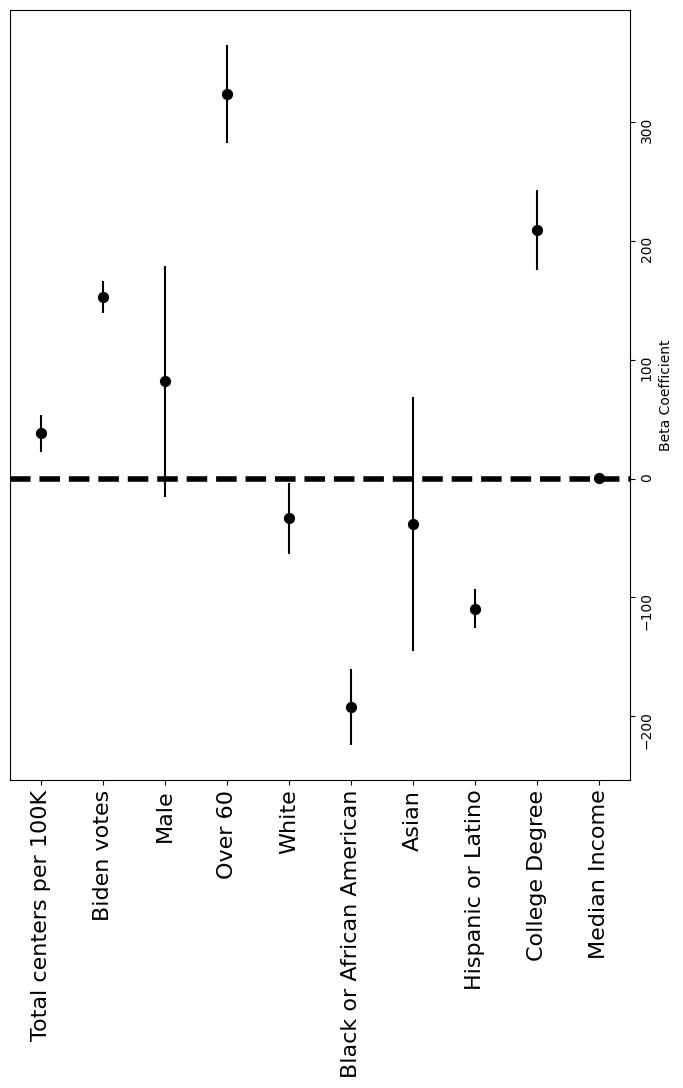

In [59]:
fig, ax = plt.subplots(figsize=(8, 10))
colors = np.where(regression_df["significant"], "red", "gray")
regression_df.plot(
    x="variables", y="coefficient", kind="bar", ax=ax, color="none", yerr="conf_int", legend=False
)
ax.set_ylabel("Beta Coefficient")
ax.set_xlabel("")
ax.scatter(
    x=np.arange(regression_df.shape[0]), marker="o", s=50, y=regression_df["coefficient"], color="black"
)
ax.axhline(y=0, linestyle="--", color="black", linewidth=4)
ax.set_xticklabels(
    ["Total centers per 100K",
        "Biden votes",
        "Male",
        "Over 60",
        "White",
        "Black or African American",
        "Asian",
        "Hispanic or Latino",
        "College Degree",
        "Median Income"
    ],
    rotation=90,
    fontsize=16,
)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.setp(ax.get_yticklabels(), rotation=90)

[Text(0.5, 1.0, 'Relationship between number of clinics and bivalent uptake')]

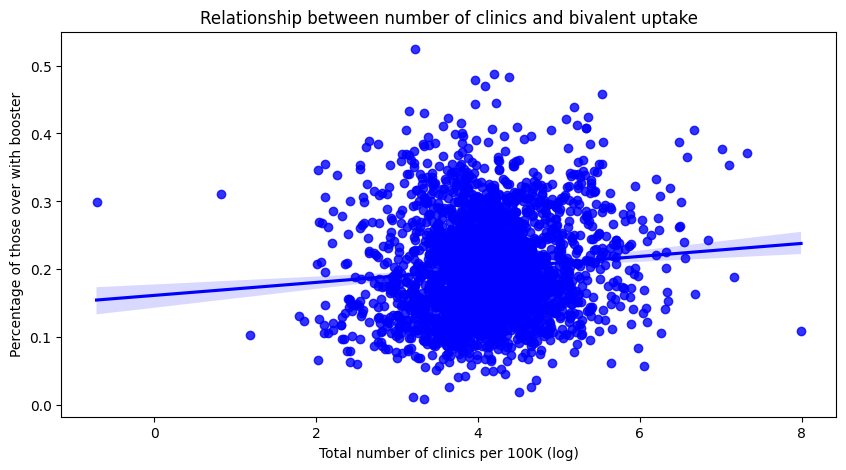

In [60]:
# graph the relationsip between clinics and bivalent uptake
## this figure does not account for any covariates

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.regplot(data=merged_df, x="total_centers_log", y="bivalent_5plus_pct_elig", color="Blue")
ax.set(
    xlabel="Total number of clinics per 100K (log)",
    ylabel="Percentage of those over with booster",
)
ax.set(title="Relationship between number of clinics and bivalent uptake")

In [61]:
# how many counties do not have vaccine data?

final_df["bivalent_5plus_pct"].isnull().sum()

60

In [62]:
data_mapped = us_map.merge(final_df, on=["GEOID"])

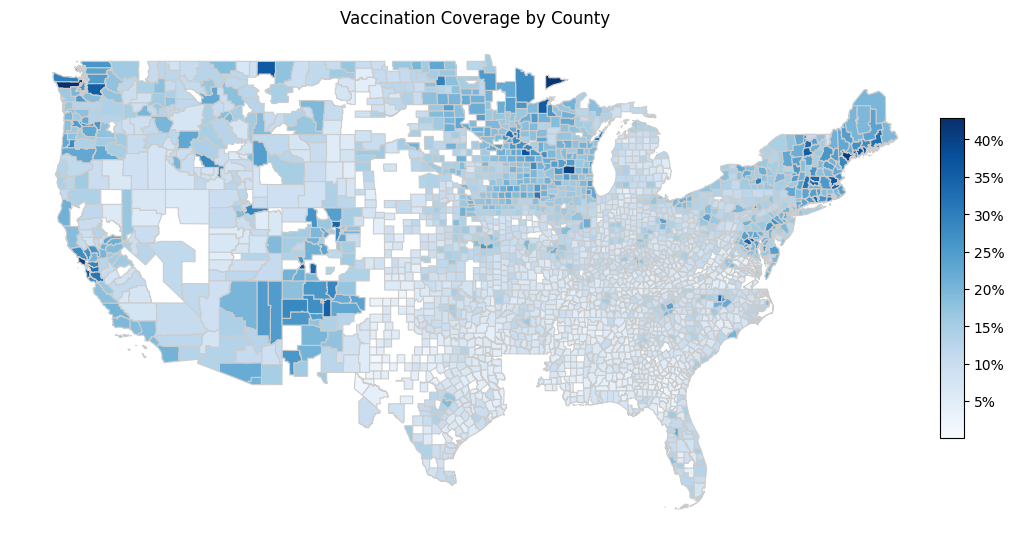

In [63]:
# plot the vaccination coverage on a map of the US

fig, ax = plt.subplots(figsize=(12,8))
data_mapped.plot(column='bivalent_5plus_pct', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

vmin, vmax = merged_df['bivalent_5plus_pct'].min(), merged_df['bivalent_5plus_pct'].max()
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar_ax = fig.add_axes([0.9, 0.3, 0.02, 0.4])
cbar = fig.colorbar(sm, cax=cbar_ax, format='%d%%')

ax.set_title("Vaccination Coverage by County")
ax.set_axis_off()


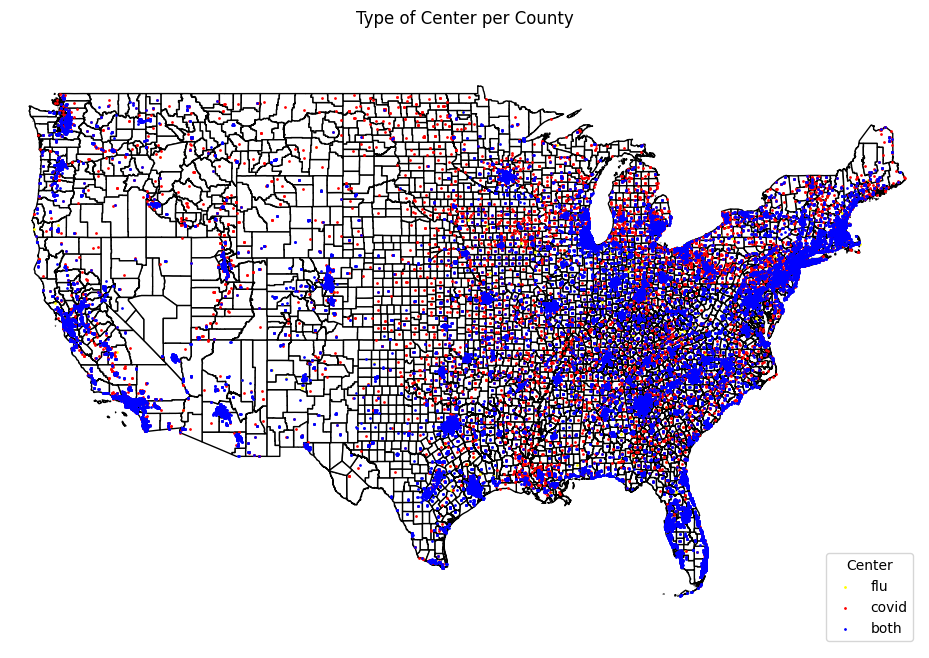

In [64]:
# plot flu, covid, both centers onto map

center_colors = {"flu": "yellow", "covid": "red", "both": "blue"}

ax = us_map.plot(color="white", edgecolor="black", figsize=(12, 8))
for center, color in center_colors.items():
    gdf[gdf["center"] == center].plot(ax=ax, color=color, markersize=1, label=center)

ax.legend(title="Center", loc="lower right")
ax.set_title("Type of Center per County")
ax.set_axis_off()

ax.set_xlim([-126, -66])
ax.set_ylim([22, 52])


plt.show()

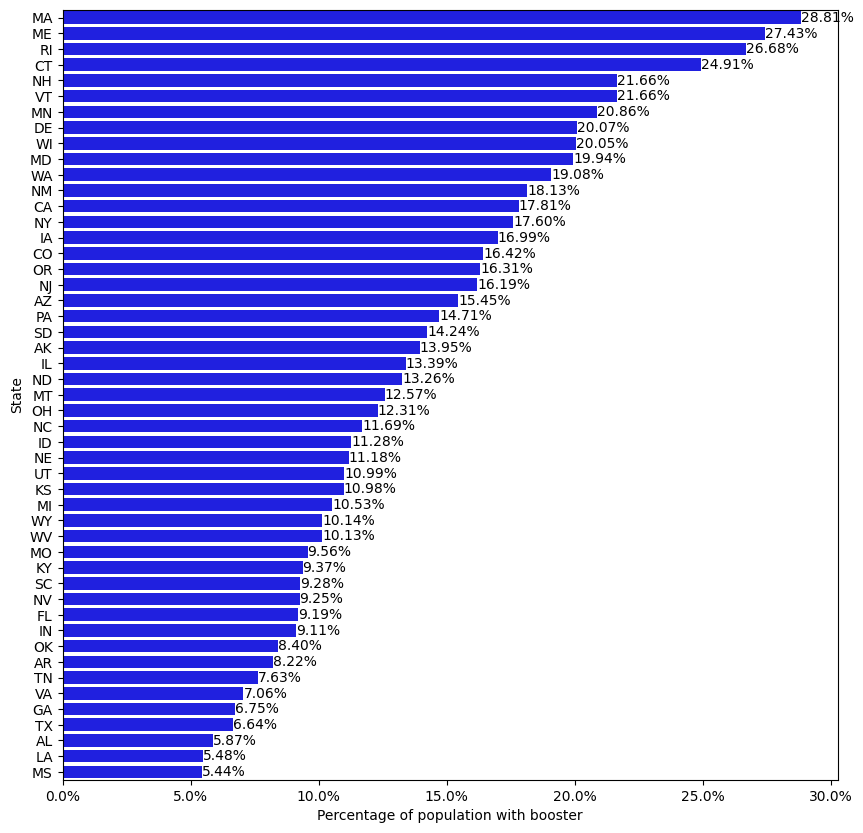

In [65]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

sns.barplot(
    data=state_averages,
    x="bivalent_5plus_pct",
    y="state",
    order=state_averages.sort_values("bivalent_5plus_pct", ascending=False).state,
    color="Blue",
)

ax.set(ylabel="State", xlabel="Percentage of population with booster")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%")